### Parametros de Praat calculados por Tomás para silabas alfa

Cargamos los datos de la tesis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

def procesar_linea(partes):
    num_elementos = len(partes)
    
    if num_elementos == 14:
        # Cuando hay 14 elementos: el primero es el nombre del archivo, el resto son numéricos
        nombre_archivo = partes[0]
        datos = [float(partes[i]) for i in range(1, 14)]
    elif num_elementos == 12:
        # Cuando hay 12 elementos: el primero es el nombre del archivo, el resto son numéricos
        nombre_archivo = partes[0]
        datos = [float(partes[i]) for i in range(1, 12)]
        # Añadir valores predeterminados para los parámetros faltantes
        datos.extend([None, None])
    elif num_elementos == 13:
        # Cuando hay 13 elementos: el primero es el nombre del archivo, el resto son numéricos
        nombre_archivo = partes[0]
        datos = [float(partes[i]) for i in range(1, 13)]
        # Añadir un valor predeterminado para el parámetro faltante
        datos.append(None)
    else:
        raise ValueError(f"Línea con número incorrecto de elementos: {num_elementos}")
    
    return nombre_archivo, datos

def leer_archivo(archivo):
    with open(archivo, 'r') as f:
        lineas = f.readlines()
    
    # Inicializar listas para almacenar los datos de cada columna
    nombres = []
    t_inicial = []
    t_final = []
    frec_min = []
    frec_max = []
    silence_th = []
    voicing = []
    octave_cost = []
    octave_jump_cost = []
    voiced_cost = []
    restantes = []

    for linea in lineas:
        partes = linea.strip().split()
        
        nombre_archivo, datos_linea = procesar_linea(partes)
        
        # Almacenar los datos en las listas correspondientes
        nombres.append(nombre_archivo)
        t_inicial.append(datos_linea[0])
        t_final.append(datos_linea[1])
        frec_min.append(datos_linea[2])
        frec_max.append(datos_linea[3])
        silence_th.append(datos_linea[4])
        voicing.append(datos_linea[5])
        octave_cost.append(datos_linea[6])
        octave_jump_cost.append(datos_linea[7])
        voiced_cost.append(datos_linea[8])
        restantes.append(datos_linea[9:])  # Agregar el resto de los datos

    # Crear un DataFrame con los datos
    df = pd.DataFrame({
        'nombre': nombres,
        't_inicial': t_inicial,
        't_final': t_final,
        'frec_min': frec_min,
        'frec_max': frec_max,
        'silence_th': silence_th,
        'voicing': voicing,
        'octave_cost': octave_cost,
        'octave_jump_cost': octave_jump_cost,
        'voiced_cost': voiced_cost,
        'restantes': restantes
    })

    return df

# Ejemplo de uso
archivo_txt = "datos_param_praat.txt"  # Cambia el nombre del archivo según corresponda
df = leer_archivo(archivo_txt)

# Imprimir los primeros registros para verificación
print(df.head())

# Guardar el DataFrame en un archivo CSV (si es necesario)
df.to_csv('datos_param_praat.csv', index=False)

# Los datos están ahora disponibles en el DataFrame 'df'
# Puedes realizar operaciones adicionales con 'df' según sea necesario






                    nombre  t_inicial  t_final  frec_min  frec_max  \
0  HA061020041409-solo.wav       2.59     3.38     900.0    3800.0   
1  HA090920041347-solo.wav       0.77     0.98     900.0    3300.0   
2  HA090920041347-solo.wav       1.64     1.83     900.0    3300.0   
3  HA090920041347-solo.wav       1.64     1.83     600.0    3300.0   
4  HA280920041338-solo.wav       1.70     1.81     600.0    3800.0   

   silence_th  voicing  octave_cost  octave_jump_cost  voiced_cost  \
0        0.07     0.10         0.05              0.30         0.20   
1        0.06     0.17         0.10              0.05         0.06   
2        0.07     0.17         0.10              0.10         0.06   
3        0.07     0.17         0.10              0.10         0.06   
4        0.10     0.10         0.01              0.10         0.06   

                restantes  
0   [1.0, 1.61, 0.0, 0.0]  
1  [1.0, 0.8, None, None]  
2  [0.0, 0.8, None, None]  
3  [1.0, 0.0, None, None]  
4  [1.0, 0.0, None

### Carguemos los datos obtenidos

In [10]:


# Supongamos que ya tienes el DataFrame 'df'
# Ejemplo: df = leer_archivo('datos_param_praat.txt')

# carguemos las columnas del data frame

t_inicial= df['t_inicial']
t_final= df['t_final']
frec_min = df['frec_min']
frec_max = df['frec_max']
silence_th = df['silence_th']
voicing = df['voicing']
octave_cost = df['octave_cost']
octave_jump_cost = df['octave_jump_cost']
voiced_cost = df['voiced_cost']
ancho_de_banda = (frec_max - frec_min)


### Veamos si hay alguna clase de correlacion entre los parametros

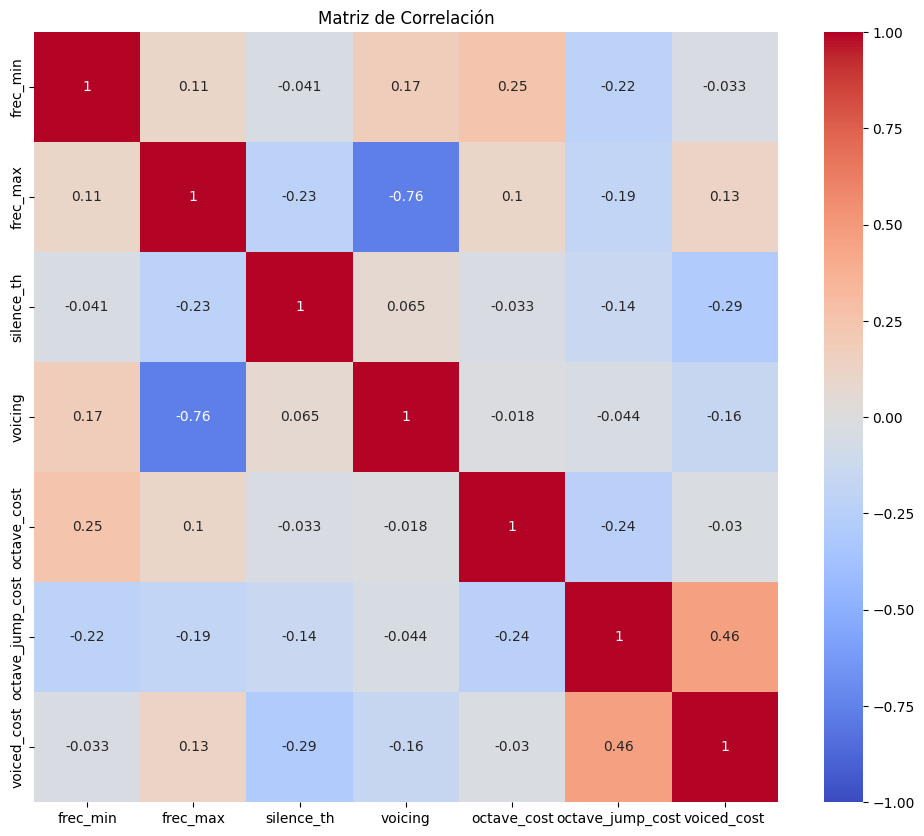

In [11]:


# Cargar los datos desde el archivo CSV
df = pd.read_csv('datos_param_praat.csv')

# Filtrar las columnas relevantes
columnas_interes = [
     'frec_min', 'frec_max', 'silence_th', 'voicing', 
    'octave_cost', 'octave_jump_cost', 'voiced_cost'
]
df_filtrado = df[columnas_interes]

# Calcular la matriz de correlación
correlacion = df_filtrado.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()


Nada parece correlacionar con nada!

### Veamos como están estadísticamente los parámetros

In [44]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('datos_param_praat.csv')

# Filtrar las columnas relevantes
columnas_interes = [
     'frec_min', 'frec_max', 'silence_th', 'voicing', 
    'octave_cost', 'octave_jump_cost', 'voiced_cost'
]
df_filtrado = df[columnas_interes]



<Axes: >

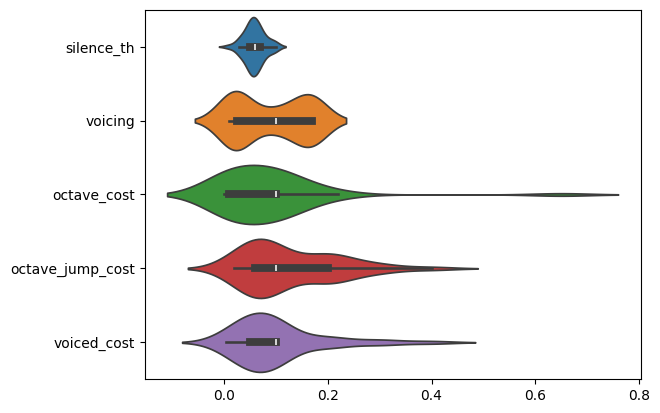

In [13]:
columnas_interes = [ 'silence_th', 'voicing',
    'octave_cost', 'octave_jump_cost', 'voiced_cost'
]
df_refiltrado = df[columnas_interes]

sns.violinplot(data=df_refiltrado, orient='h')


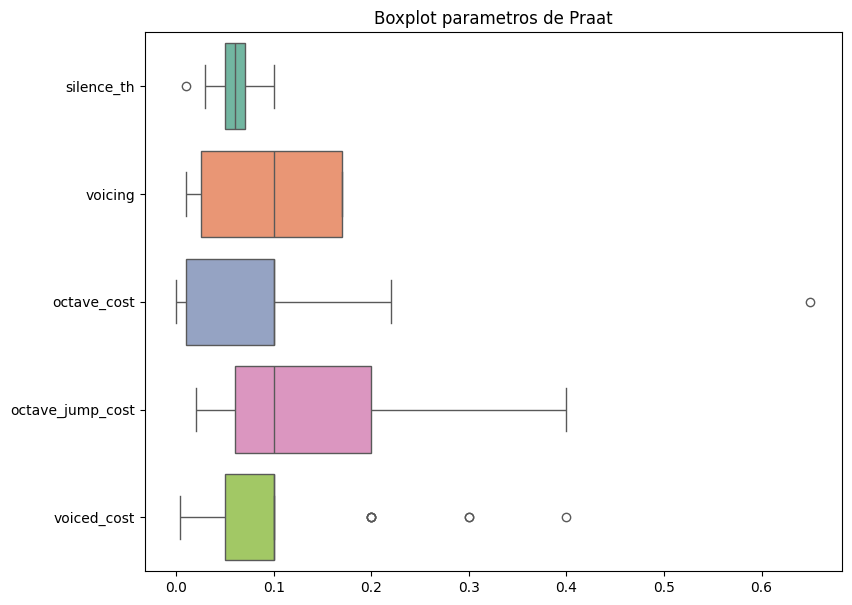

In [46]:
columnas_interes = [
     'silence_th', 'voicing',
    'octave_cost', 'octave_jump_cost', 'voiced_cost'
]
df_refiltrado = df[columnas_interes]

plt.figure(figsize=(9, 7))
sns.boxplot(data=df_refiltrado, orient='h', palette='Set2')
plt.title('Boxplot parametros de Praat')
plt.savefig('boxplot_parametros_tomas.png', dpi=300, bbox_inches='tight')
plt.show()



### Armemos una tabla donde podamos ver parámetros estadísticos básicos de los parametros

In [47]:
# Seleccionamos las columnas de interés
columnas_interes = [
     'silence_th', 'voicing',
    'octave_cost', 'octave_jump_cost', 'voiced_cost'
]
df_refiltrado = df[columnas_interes]

# Calculamos la media y el desvío estándar
media = df_refiltrado.mean()
desvio_std = df_refiltrado.std()

# Calculamos el desvío estándar en porcentaje
desvio_std_pct = (desvio_std / media) * 100

# Creamos el DataFrame con las estadísticas y el desvío estándar en porcentaje
tabla_estadisticas_completa = pd.DataFrame({
    'Media': media,
    'Desvío Estándar': desvio_std,
    'Desvío Estándar (%)': desvio_std_pct,
    'Mediana': df_refiltrado.median(),
    'Mínimo': df_refiltrado.min(),
    'Máximo': df_refiltrado.max(),
    'Número de Datos (N)': df_refiltrado.count()
})

# Mostramos la tabla completa

tabla_estadisticas_completa.to_excel("tabla_estadisticas_completa.xlsx", index=False)

tabla_estadisticas_completa

,Media,Desvío Estándar,Desvío Estándar (%),Mediana,Mínimo,Máximo,Número de Datos (N)
silence_th,0.058486,0.019644,33.586425,0.06,0.0100,0.10,37
voicing,0.090541,0.067400,74.441752,0.10,0.0100,0.17,37
octave_cost,0.086678,0.112151,129.386986,0.10,0.0001,0.65,37
octave_jump_cost,0.130541,0.091498,70.091794,0.10,0.0200,0.40,37
voiced_cost,0.103351,0.086506,83.701210,0.10,0.0040,0.40,37


### Ahora agreguemos a la tabla de parámetros original una forma de ver los outliyers

In [48]:
from IPython.display import display

# Función para detectar outliers basado en el rango intercuartílico (IQR)
def detectar_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Seleccionamos las columnas de interés
columnas_interes = [
    'silence_th', 'voicing',
    'octave_cost', 'octave_jump_cost', 'voiced_cost'
]
df_refiltrado = df[columnas_interes]

# Creamos un DataFrame de outliers
outliers = df_refiltrado.apply(detectar_outliers)

# Función para resaltar celdas en rojo si es un outlier
def resaltar_outliers(val, es_outlier):
    color = 'background-color: red' if es_outlier else ''
    return color

# Aplicamos el estilo para resaltar outliers
df_resaltado = df_refiltrado.style.apply(
    lambda x: ['background-color: red' if es_outlier else '' for es_outlier in outliers[x.name]], 
    axis=0
)

df_resaltado.to_excel("datos_resaltados.xlsx", index=False)
# Mostramos la tabla resaltada
df_resaltado


,silence_th,voicing,octave_cost,octave_jump_cost,voiced_cost
0,0.070000,0.100000,0.050000,0.300000,0.200000
1,0.060000,0.170000,0.100000,0.050000,0.060000
2,0.070000,0.170000,0.100000,0.100000,0.060000
3,0.070000,0.170000,0.100000,0.100000,0.060000
4,0.100000,0.100000,0.010000,0.100000,0.060000
5,0.080000,0.100000,0.050000,0.270000,0.100000
6,0.090000,0.100000,0.100000,0.200000,0.100000
7,0.050000,0.170000,0.150000,0.100000,0.300000
8,0.060000,0.150000,0.045000,0.070000,0.030000
9,0.050000,0.150000,0.030000,0.070000,0.030000


### Comparemos con los parámetros que estoy extrayendo yo

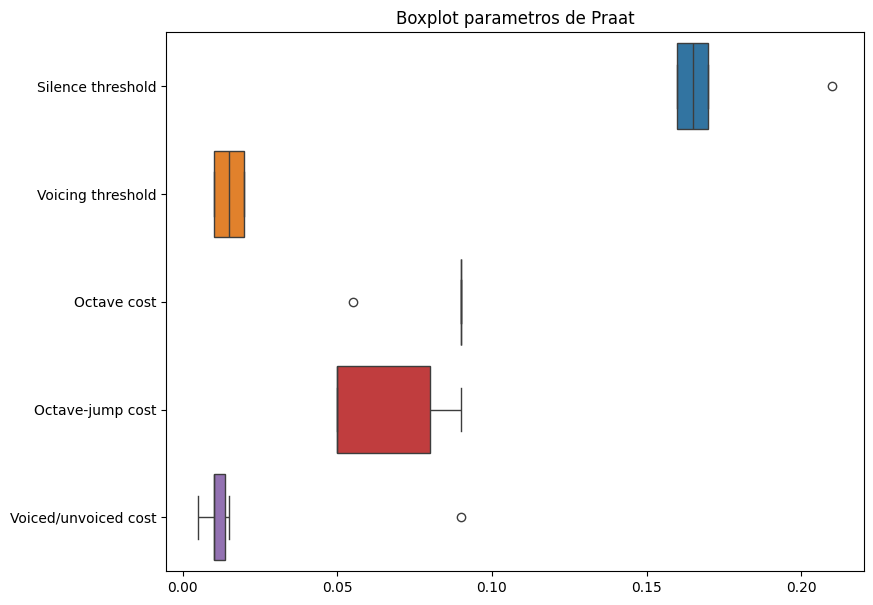

In [19]:

# Leer el archivo CSV exportado
df = pd.read_csv('parametros_praat_200409_grabaciones - raw audio.csv')

# Eliminar columnas vacías o filas con valores nulos
df_cleaned = df 

# Seleccionar las columnas numéricas que te interesan para los box plots
columns_to_plot = [ 'Silence threshold', 'Voicing threshold',
                   'Octave cost', 'Octave-jump cost', 'Voiced/unvoiced cost']

# Crear los box plots
plt.figure(figsize=(9, 7))
sns.boxplot(data=df_cleaned[columns_to_plot], orient='h')
plt.title('Boxplot parametros de Praat')

plt.show()


### Juntemos todo para poder comparar los datos de Tomás vs los míos

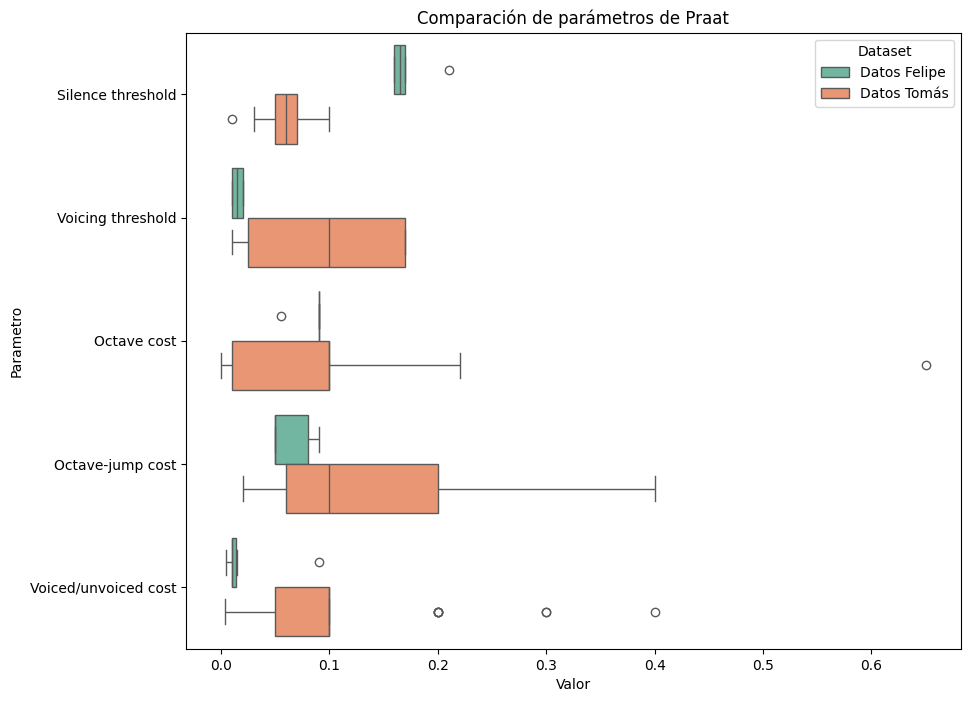

In [43]:


# Selección de columnas específicas de cada DataFrame
columns_cleaned = ['Silence threshold', 'Voicing threshold', 'Octave cost', 
                   'Octave-jump cost', 'Voiced/unvoiced cost']

columns_refiltrado = {
                      'silence_th': 'Silence threshold',
                      'voicing': 'Voicing threshold',
                      'octave_cost': 'Octave cost',
                      'octave_jump_cost': 'Octave-jump cost',
                      'voiced_cost': 'Voiced/unvoiced cost'}

# Renombrar columnas en df_refiltrado para que coincidan con las de df_cleaned
df_refiltrado = df_refiltrado.rename(columns=columns_refiltrado)

# Agregar una columna que indique a qué conjunto de datos pertenece cada fila
df_cleaned['Dataset'] = 'Datos Felipe'
df_refiltrado['Dataset'] = 'Datos Tomás'

# Seleccionar solo las columnas que interesan en ambos DataFrames
df_cleaned_filtered = df_cleaned[columns_cleaned + ['Dataset']]
df_refiltrado_filtered = df_refiltrado[list(columns_refiltrado.values()) + ['Dataset']]

# Concatenar ambos DataFrames
df_concat = pd.concat([df_cleaned_filtered, df_refiltrado_filtered])

# Convertir los datos a formato "long" (apilar columnas)
df_melted = df_concat.melt(id_vars='Dataset', value_vars=columns_cleaned, 
                           var_name='Parametro', value_name='Valor')

# Crear los box plots comparativos
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_melted, x='Valor', y='Parametro', hue='Dataset', orient='h', palette='Set2')

# Título del gráfico
plt.title('Comparación de parámetros de Praat')

plt.savefig('boxplot_comparacion.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()




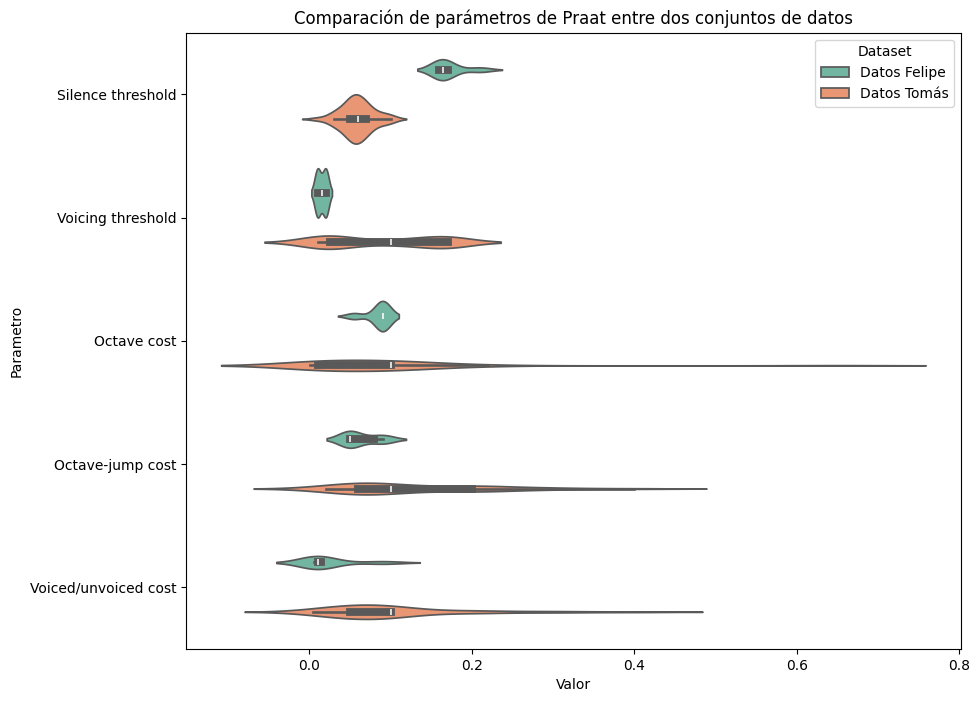

In [33]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df_melted, x='Valor', y='Parametro', hue='Dataset', orient='h', palette='Set2')

# Título del gráfico
plt.title('Comparación de parámetros de Praat')

# Mostrar el gráfico
plt.show()

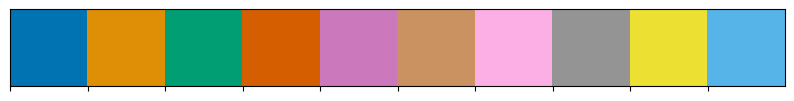

In [41]:

sns.palplot(sns.color_palette('colorblind'))  # Cambia 'Set2' por cualquier otra paleta que quieras ver


In [ ]:
'deep'
'muted'
'bright'
'pastel'
'dark'
'colorblind'